# Problem Statement:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). Classification can be of two types:

* Binary Classification : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.
* Multiclass Classification : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.

# Data
For this practice problem, we have been given three CSV files: train, test and sample submission.

* Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
* Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.
* Sample submission file contains the format in which we have to submit our predictions.

# MY CAPSTONE PROJECT 

# LOAN DEFAULTER

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib as pt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan=pd.read_csv('TrainDataset.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002862,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban,N
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N
2,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
3,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,N
4,LP002804,Female,Yes,0,Graduate,No,4180,2306.0,182.0,360.0,1.0,Semiurban,Y


##### As Loan_ID has unique values  and it refers each person it is  removed from the data set

In [4]:
loan=loan.drop(['Loan_ID'],axis=1)

In [5]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban,N
1,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N
2,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
3,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,N
4,Female,Yes,0,Graduate,No,4180,2306.0,182.0,360.0,1.0,Semiurban,Y


In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 12 columns):
Gender               479 non-null object
Married              488 non-null object
Dependents           478 non-null object
Education            491 non-null object
Self_Employed        466 non-null object
ApplicantIncome      491 non-null int64
CoapplicantIncome    491 non-null float64
LoanAmount           472 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       453 non-null float64
Property_Area        491 non-null object
Loan_Status          491 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 46.1+ KB


In [7]:
loan.isnull().sum(axis=0)

Gender               12
Married               3
Dependents           13
Education             0
Self_Employed        25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     11
Credit_History       38
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,472.000000,480.000000,453.000000
mean,5302.311609,1687.507373,144.675847,340.200000,0.849890
std,5885.669336,3162.895498,85.964139,67.329074,0.357574
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2874.000000,0.000000,100.000000,360.000000,1.000000
50%,3833.000000,1213.000000,125.000000,360.000000,1.000000
75%,5717.000000,2333.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [9]:
corr=loan.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.121714,0.564757,-0.021943,-0.051356
CoapplicantIncome,-0.121714,1.000000,0.178819,-0.066617,0.017658
LoanAmount,0.564757,0.178819,1.000000,0.034864,-0.016626
Loan_Amount_Term,-0.021943,-0.066617,0.034864,1.000000,-0.005180
Credit_History,-0.051356,0.017658,-0.016626,-0.005180,1.000000


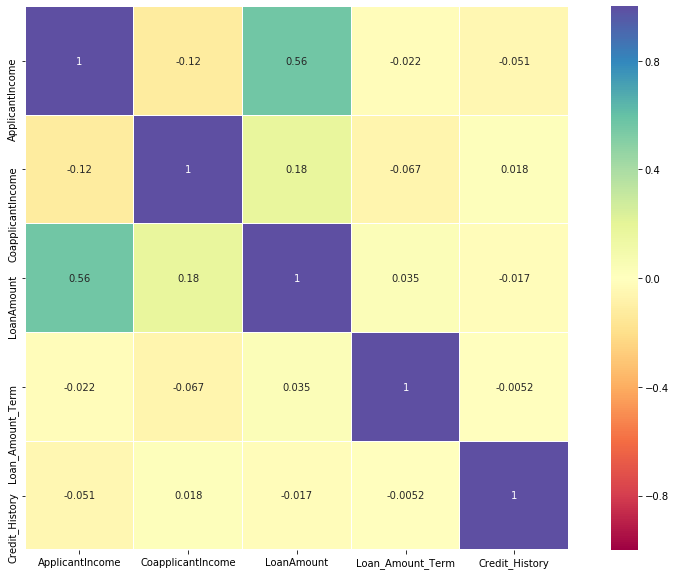

In [10]:
f, ax = plt.subplots(figsize=(15, 10)) 
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)

In [11]:
loan.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5353.337748,1906.231788,145.943262,341.753425,0.550000
Y,5279.650000,1590.368000,144.135952,339.520958,0.984026


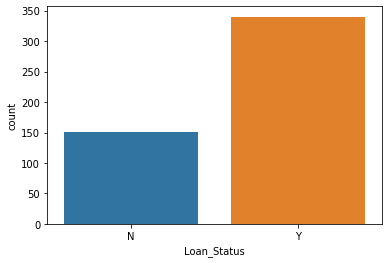

In [12]:
sns.countplot(x='Loan_Status',data=loan)

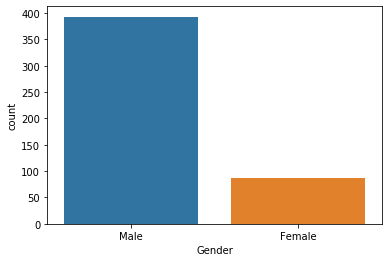

In [13]:
sns.countplot(x='Gender',data=loan)

#### we can see that most  of the candidates are Male

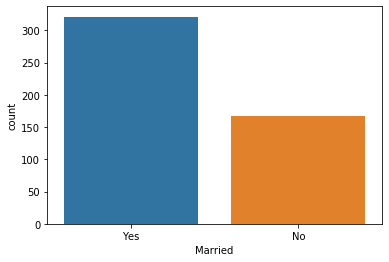

In [14]:
sns.countplot(x='Married',data=loan)

#### most of the candidates are married

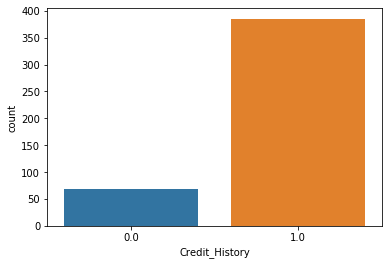

In [15]:
sns.countplot(x='Credit_History',data=loan)

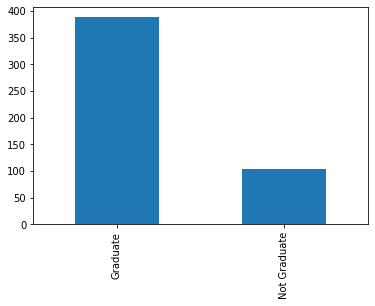

In [16]:
loan['Education'].value_counts().plot.bar()

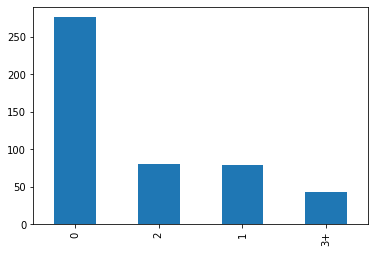

In [17]:
loan['Dependents'].value_counts().plot.bar()

#### we can see that majority of the candidates have no dependants

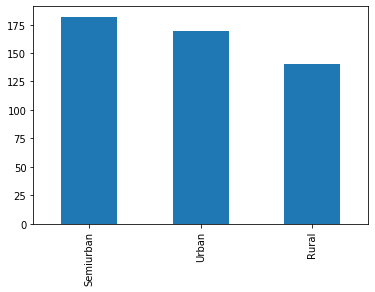

In [18]:
loan['Property_Area'].value_counts().plot.bar()

#### majority of the candidates are from semi urban area

In [19]:
loan.select_dtypes(exclude=[object]).head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,6125,1625.0,187.0,480.0,1.0
1,4000,7750.0,290.0,360.0,1.0
2,9833,1833.0,182.0,180.0,1.0
3,2178,0.0,66.0,300.0,0.0
4,4180,2306.0,182.0,360.0,1.0


In [20]:
loan.select_dtypes(exclude=[np.number]).head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,Yes,2,Not Graduate,No,Semiurban,N
1,Male,Yes,3+,Graduate,No,Semiurban,N
2,NaN,Yes,1,Graduate,Yes,Urban,Y
3,Male,Yes,1,Graduate,Yes,Rural,N
4,Female,Yes,0,Graduate,No,Semiurban,Y


## Handling the Missing Values 

In [21]:
loan['Gender'].fillna((loan['Gender'].mode()[0]), inplace=True)

In [22]:
loan['Credit_History'].fillna((loan['Credit_History'].mode()[0]), inplace=True)

In [23]:
loan['Married'].fillna((loan['Married'].mode()[0]), inplace=True)

In [24]:
loan['Self_Employed'].fillna((loan['Self_Employed'].mode()[0]), inplace=True)

In [25]:
loan['LoanAmount'].fillna((loan['LoanAmount'].mean()), inplace=True)

In [26]:
loan['Loan_Amount_Term'].fillna((loan['Loan_Amount_Term'].mean()), inplace=True)

In [27]:
loan['Dependents']=loan['Dependents'].replace('3+','3')

In [28]:
loan['Dependents'].fillna((loan['Dependents'].median()), inplace=True)

In [29]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban,N
1,Male,Yes,3,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N
2,Male,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
3,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,N
4,Female,Yes,0,Graduate,No,4180,2306.0,182.0,360.0,1.0,Semiurban,Y


In [30]:
loan.isnull().sum(axis=0)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Handling the Categorical Values

In [31]:
loan.select_dtypes(exclude=[np.number]).head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,Yes,2,Not Graduate,No,Semiurban,N
1,Male,Yes,3,Graduate,No,Semiurban,N
2,Male,Yes,1,Graduate,Yes,Urban,Y
3,Male,Yes,1,Graduate,Yes,Rural,N
4,Female,Yes,0,Graduate,No,Semiurban,Y


In [32]:
loan['Property_Area']= pd.get_dummies(loan['Property_Area'], drop_first = True)

In [33]:
loan['Gender']=loan.Gender.map({'Female':0,'Male':1})

In [34]:
loan['Married']=loan.Married.map({'No':0,'Yes':1})

In [35]:
loan['Education']=loan.Education.map({'Not Graduate':0,'Graduate':1})

In [36]:
loan['Self_Employed']=loan.Self_Employed.map({'No':0,'Yes':1})

In [37]:
loan['Loan_Status']=loan.Loan_Status.map({'N':0,'Y':1})

In [38]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,2,0,0,6125,1625.0,187.0,480.0,1.0,1,0
1,1,1,3,1,0,4000,7750.0,290.0,360.0,1.0,1,0
2,1,1,1,1,1,9833,1833.0,182.0,180.0,1.0,0,1
3,1,1,1,1,1,2178,0.0,66.0,300.0,0.0,0,0
4,0,1,0,1,0,4180,2306.0,182.0,360.0,1.0,1,1


In [39]:
loan.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          uint8
Loan_Status            int64
dtype: object

In [40]:
loan['CoapplicantIncome'] = loan.CoapplicantIncome.astype(int)

In [41]:
loan['Credit_History'] = loan.Credit_History.astype(int)

In [42]:
loan['LoanAmount'] = loan.LoanAmount.astype(int)

In [43]:
loan['Loan_Amount_Term'] = loan.Loan_Amount_Term.astype(int)

In [44]:
loan['Dependents'] = loan.Dependents.astype(int)

In [45]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,2,0,0,6125,1625,187,480,1,1,0
1,1,1,3,1,0,4000,7750,290,360,1,1,0
2,1,1,1,1,1,9833,1833,182,180,1,0,1
3,1,1,1,1,1,2178,0,66,300,0,0,0
4,0,1,0,1,0,4180,2306,182,360,1,1,1


In [46]:
loan.dtypes

Gender               int64
Married              int64
Dependents           int32
Education            int64
Self_Employed        int64
ApplicantIncome      int64
CoapplicantIncome    int32
LoanAmount           int32
Loan_Amount_Term     int32
Credit_History       int32
Property_Area        uint8
Loan_Status          int64
dtype: object

# EXPLORATORY DATA ANALYSIS

## UNI-VARIATE ANALYSIS

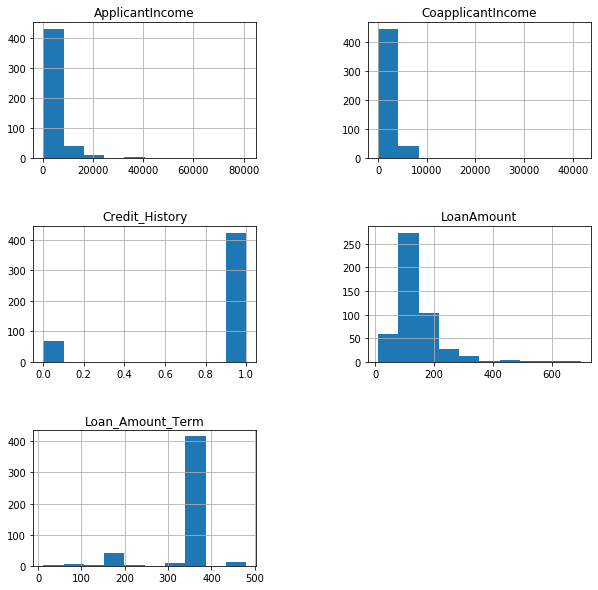

In [47]:
num_vars= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
loan.hist(column=num_vars,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

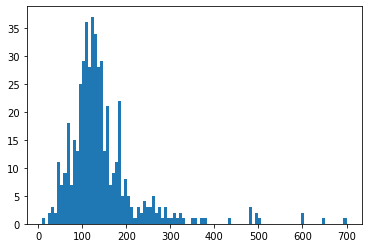

In [48]:
plt.hist(loan.LoanAmount,bins=100)
plt.show()

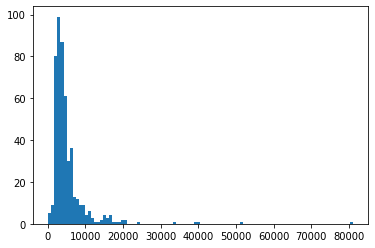

In [49]:
plt.hist(loan.ApplicantIncome,bins=100)
plt.show()

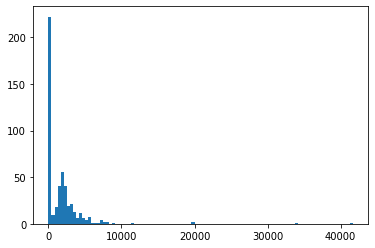

In [50]:
plt.hist(loan.CoapplicantIncome,bins=100)
plt.show()

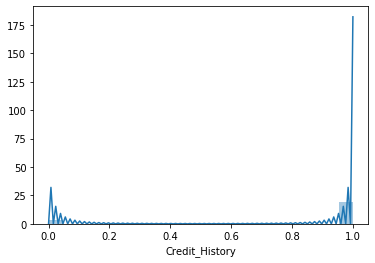

In [51]:
sns.distplot(loan['Credit_History']);

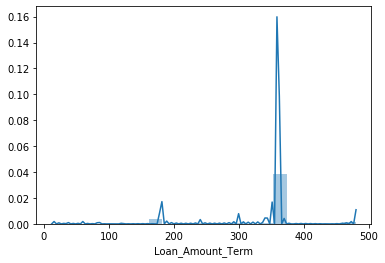

In [52]:
sns.distplot(loan['Loan_Amount_Term']);

##### we can see that the above graphs are left skewed and loan amaount term is right skewed

## Bi- Variate Analysis

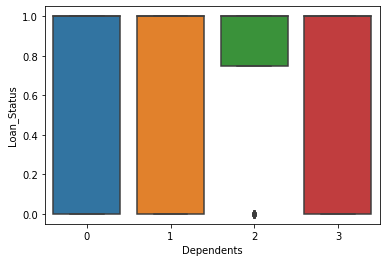

In [53]:
sns.boxplot(x='Dependents',y='Loan_Status',data=loan)
plt.show()

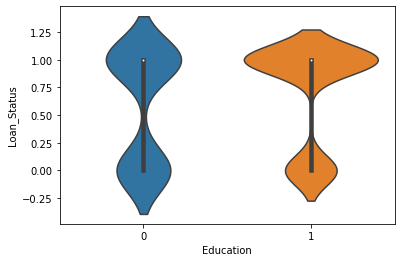

In [54]:
sns.violinplot(x='Education',y='Loan_Status',data=loan)
plt.show()

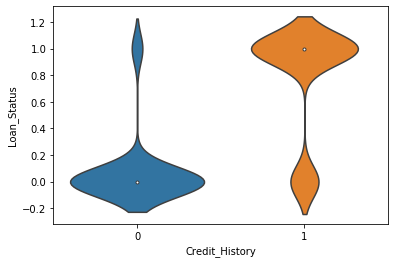

In [55]:
sns.violinplot(x='Credit_History',y='Loan_Status',data=loan)
plt.show()

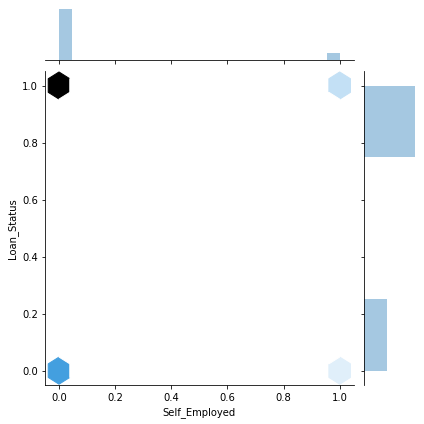

In [56]:
sns.jointplot(x="Self_Employed", y="Loan_Status",kind='hex', data=loan)

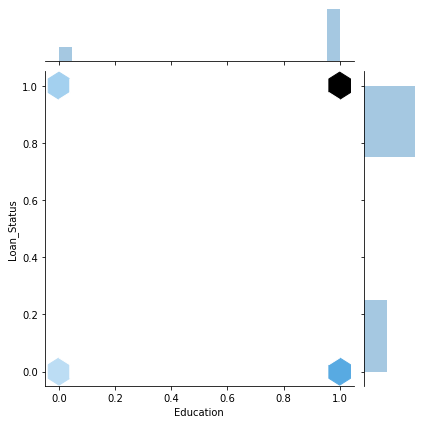

In [57]:
sns.jointplot(x="Education", y="Loan_Status",kind='hex', data=loan)

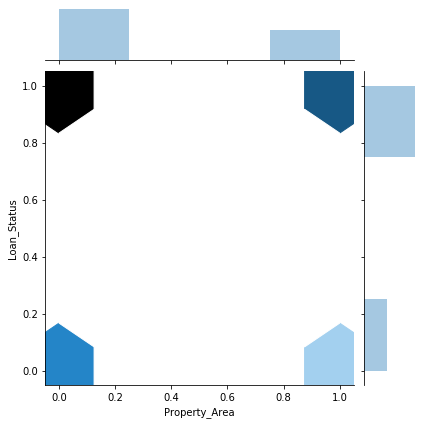

In [58]:
sns.jointplot(x="Property_Area", y="Loan_Status",kind='hex', data=loan)

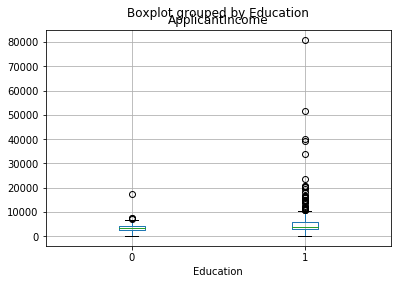

In [59]:
loan.boxplot(column='ApplicantIncome', by = 'Education') 
plt.show()

# PREDICTIVE MODELING

## Train-Test Splitting

In [60]:
x=loan.drop('Loan_Status',axis=1)
y=loan[['Loan_Status']]

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [63]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
466,1,1,0,1,0,2625,6250,187,360,1,0
265,1,1,0,1,0,4817,923,120,180,1,0
64,1,0,0,0,0,3975,2531,55,360,1,0
5,1,0,0,1,0,3750,4750,176,360,1,0
392,1,1,0,1,0,3333,2500,128,360,1,1


In [64]:
y.head()

,Loan_Status
0,0
1,0
2,1
3,0
4,1


# Logistic Regression

In [65]:
from sklearn import datasets,linear_model
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()

In [67]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
pred_LR=lr.predict(x_test)

#### accuracy score

In [69]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_LR))

0.7702702702702703


#### Classification Report

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.81      0.36      0.50        47
           1       0.76      0.96      0.85       101

    accuracy                           0.77       148
   macro avg       0.79      0.66      0.68       148
weighted avg       0.78      0.77      0.74       148



#### Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
conf_mat=confusion_matrix(y_test,pred_LR)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
cm=pd.DataFrame(conf_mat,index=index,columns=columns)
cm

,predicted no,predicted yes
actual No,17,30
actual yes,4,97


## The Accuracy Score for Logistic Regression is 0.7702702702702703

# RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
clf = RandomForestClassifier(n_estimators=18)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
pred_RF=clf.predict(x_test)

#### accuracy score

In [76]:
print(accuracy_score(y_test,pred_RF))

0.7635135135135135


#### confusion matrix

In [79]:
conf_mat=confusion_matrix(y_test,pred_RF)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
cm=pd.DataFrame(conf_mat,index=index,columns=columns)
cm

,predicted no,predicted yes
actual No,22,25
actual yes,10,91


#### classification report 

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.69      0.47      0.56        47
           1       0.78      0.90      0.84       101

    accuracy                           0.76       148
   macro avg       0.74      0.68      0.70       148
weighted avg       0.75      0.76      0.75       148



## The Accuracy Score for Random Forest  is 0.7635135135135135

# DECISION TREE

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [83]:
pred_DT=dt.predict(x_test)

#### accuracy score

In [84]:
print(accuracy_score(y_test,pred_DT))

0.7027027027027027


#### confusion matrix

In [85]:
conf_mat=confusion_matrix(y_test,pred_DT)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
cm=pd.DataFrame(conf_mat,index=index,columns=columns)
cm

,predicted no,predicted yes
actual No,25,22
actual yes,22,79


#### classification report 

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        47
           1       0.78      0.78      0.78       101

    accuracy                           0.70       148
   macro avg       0.66      0.66      0.66       148
weighted avg       0.70      0.70      0.70       148



## The Accuracy Score for  Decision Tree is  0.7027027027027027

## Reading the test data and cleaning if necessary

In [87]:
test=pd.read_csv('TestDataset.csv')

In [88]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001519,Female,No,0,Graduate,No,10000,1666.0,225.0,360.0,1.0,Rural
1,LP002403,Male,No,0,Graduate,Yes,10416,0.0,187.0,360.0,0.0,Urban
2,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban
3,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural
4,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban


In [89]:
test=test.drop(['Loan_ID'],axis=1)

In [90]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Female,No,0,Graduate,No,10000,1666.0,225.0,360.0,1.0,Rural
1,Male,No,0,Graduate,Yes,10416,0.0,187.0,360.0,0.0,Urban
2,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban
3,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural
4,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban


In [91]:
test.isnull().sum(axis=0)

Gender                1
Married               0
Dependents            2
Education             0
Self_Employed         7
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            3
Loan_Amount_Term      3
Credit_History       12
Property_Area         0
dtype: int64

### handling missing values

In [92]:
test['Gender'].fillna((test['Gender'].mode()[0]), inplace=True)

In [93]:
test['Dependents']=test['Dependents'].replace('3+','3')

In [94]:
test['Dependents'].fillna((test['Dependents'].median()), inplace=True)

In [95]:
test['Self_Employed'].fillna((test['Self_Employed'].mode()[0]), inplace=True)

In [96]:
test['LoanAmount'].fillna((test['LoanAmount'].mean()), inplace=True)

In [97]:
test['Loan_Amount_Term'].fillna((test['Loan_Amount_Term'].mean()), inplace=True)

In [98]:
test['Credit_History'].fillna((test['Credit_History'].mode()[0]), inplace=True)

In [99]:
test.isnull().sum(axis=0)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### handling the categorical variables

In [100]:
test.select_dtypes(exclude=[np.number]).head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Female,No,0,Graduate,No,Rural
1,Male,No,0,Graduate,Yes,Urban
2,Male,Yes,1,Graduate,No,Semiurban
3,Male,Yes,0,Graduate,No,Rural
4,Male,Yes,1,Graduate,No,Semiurban


In [101]:
test['Property_Area']= pd.get_dummies(test['Property_Area'], drop_first = True)

In [102]:
test['Gender']=test.Gender.map({'Female':0,'Male':1})

In [103]:
test['Married']=test.Married.map({'No':0,'Yes':1})

In [104]:
test['Education']=test.Education.map({'Not Graduate':0,'Graduate':1})

In [105]:
test['Self_Employed']=test.Self_Employed.map({'No':0,'Yes':1})

In [106]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,10000,1666.0,225.0,360.0,1.0,0
1,1,0,0,1,1,10416,0.0,187.0,360.0,0.0,0
2,1,1,1,1,0,3315,0.0,96.0,360.0,1.0,1
3,1,1,0,1,0,3707,3166.0,182.0,349.2,1.0,0
4,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1


In [107]:
test.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          uint8
dtype: object

In [108]:
test['CoapplicantIncome'] = test.CoapplicantIncome.astype(int)

In [109]:
test['Credit_History'] = test.Credit_History.astype(int)

In [110]:
test['LoanAmount'] = test.LoanAmount.astype(int)

In [111]:
test['Loan_Amount_Term'] = test.Loan_Amount_Term.astype(int)

In [112]:
test['Dependents'] = test.Dependents.astype(int)

In [113]:
test.dtypes

Gender               int64
Married              int64
Dependents           int32
Education            int64
Self_Employed        int64
ApplicantIncome      int64
CoapplicantIncome    int32
LoanAmount           int32
Loan_Amount_Term     int32
Credit_History       int32
Property_Area        uint8
dtype: object

In [114]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,10000,1666,225,360,1,0
1,1,0,0,1,1,10416,0,187,360,0,0
2,1,1,1,1,0,3315,0,96,360,1,1
3,1,1,0,1,0,3707,3166,182,349,1,0
4,1,1,1,1,0,12841,10968,349,360,1,1


## Predictions For Test Dataset by choosing the best model

## after looking into metrics i.e accuracy score,f1 score,precision, recall and confusion matrix we can say that Logistic Regression is the best classification model for this data

## LOGISTIC REGRESSION FOR TEST

In [115]:
pred_LR=lr.predict(test)

In [116]:
pred_LR

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

## RANDOM FOREST FOR TEST

In [117]:
pred_RF=lr.predict(test)

In [118]:
pred_RF

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

## DECISION TREE FOR TEST

In [119]:
pred_DT=lr.predict(test)

In [120]:
pred_DT

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

## converting into csv file

## Logistic Regression

In [126]:
submission_df={"SECTION":pred_LR}
submission=pd.DataFrame(submission_df)
submission.to_csv("loan_default_Logistic.csv",index=False,header=False)

## Decision Tree

In [124]:
submission_df={"SECTION":pred_DT}
submission=pd.DataFrame(submission_df)
submission.to_csv("loan_default_Decision.csv",index=False,header=False)

## Random Forest

In [125]:
submission_df={"SECTION":pred_RF}
submission=pd.DataFrame(submission_df)
submission.to_csv("loan_default_Random.csv",index=False,header=False)